In [122]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)

# df.head(10)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [123]:
import yfinance as yf
from datetime import datetime

# Fetch data for Apple Inc. from Yahoo Finance
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())

# Show the data
print(df.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-01-03  14.621429  14.732143  14.607143  14.686786  12.449691  302220800
2012-01-04  14.642857  14.810000  14.617143  14.765714  12.516598  260022000
2012-01-05  14.819643  14.948214  14.738214  14.929643  12.655556  271269600
2012-01-06  14.991786  15.098214  14.972143  15.085714  12.787856  318292800
2012-01-09  15.196429  15.276786  15.048214  15.061786  12.767573  394024400


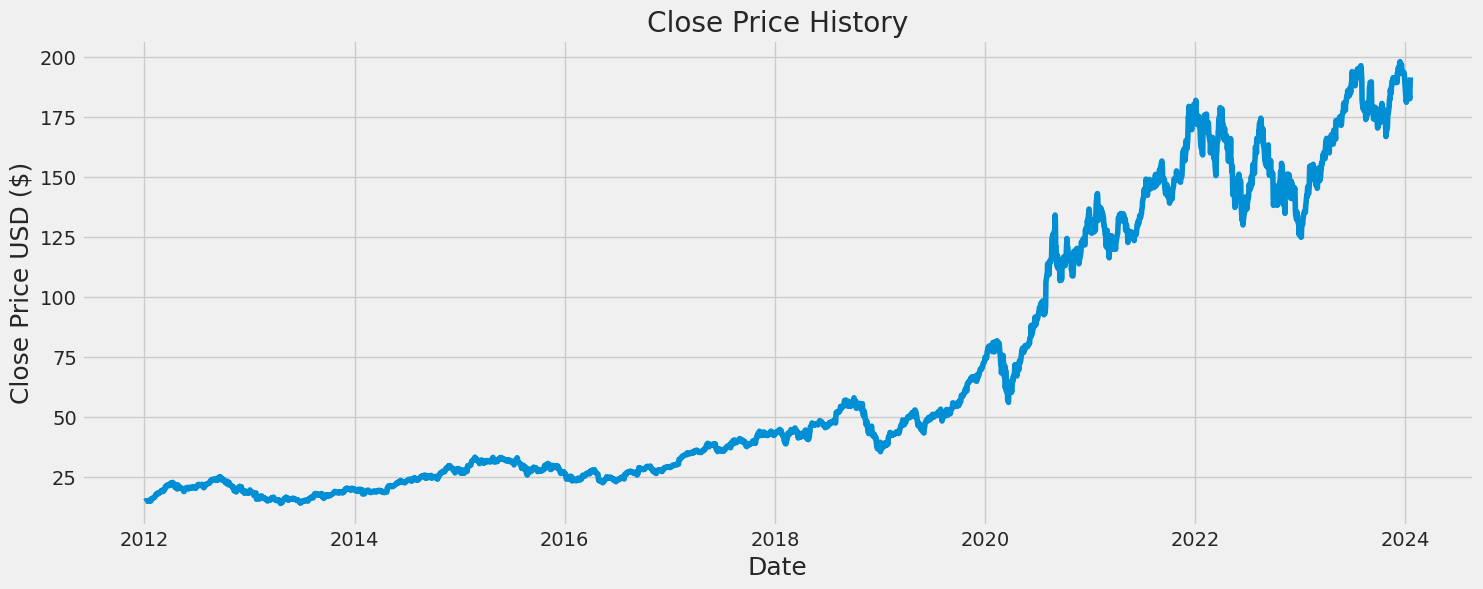

In [124]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [125]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2880

In [126]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.91621526],
       [0.94852375],
       [0.96443357]])

In [127]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(100, len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 101:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914,
       0.04253425, 0.04053485, 0.044235  , 0.04630809, 0.04533651,
       0.04715362, 0.04764813, 0.04613744, 0.04570304, 0.04503786,
       0.04163636, 0.03676877, 0.04250322, 0.04223948, 0.0381

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2780/2780 [==============================] - 32s 10ms/step - loss: 0.0011


In [129]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 100: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])


# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
# print(x_test)
# print(y_test)
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 7ms/step


7.8190565335503965

<ipython-input-131-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


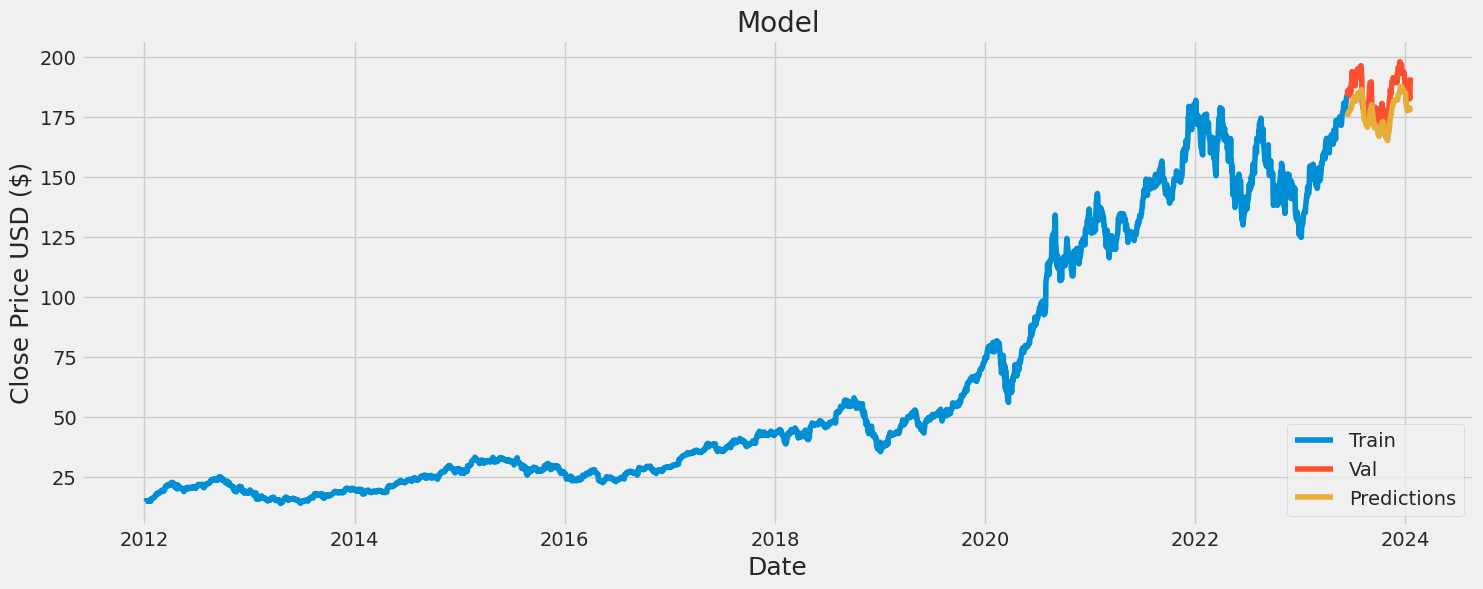

In [131]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [132]:
df1=pd.read_csv('/content/drive/MyDrive/apple dataset/final_dataset.csv')

In [133]:
df1.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Cashflow,Net income,Labels,Top1,Top2,Top3,Top4,Top5
0,2012-01-30,15.918214,16.210714,15.906786,16.178928,13.732617,379341200,"479,216.67",193.7,1,Aggrieved Over Grief as a Diagnosis in DSM,Lara Stone & Kate Moss Pose For 'LOVE' With Ki...,Tips To Help Your Dog Deal With Divorce,The London Declaration: A Tipping Point For Th...,"10 Dips, Nibbles And Dishes For Game Day"
1,2012-01-31,16.271070,16.365713,16.181070,16.302856,13.837807,391683600,"479,216.67",193.7,1,The Couple That Argues Together Stays Together...,Wood Shop At Haus Interior By David Stark And ...,Turn Up The Heat,Healthy Mexican At Home: Frito Pie Makeover,SAG Awards Fashion: Wedding Dress Inspiration ...
2,2012-02-01,16.371786,16.392500,16.269644,16.292500,13.829018,270046000,"479,216.67",193.7,0,5 Flat Screen TV Mounts For Your Home (PHOTOS),Divorce Over Infidelity? Not So Fast...,"Tall, Dark, Handsome and Not Likely to Die of ...","Allaire Heisig, Model Who Closed Marc by Marc ...",Super Bowl Playlist: Get Amped For Your Workou...
3,2012-02-02,16.282143,16.327499,16.213572,16.254286,13.796582,186796400,"479,216.67",193.7,0,Craft Of The Day: Birdseed Ornaments,The Benefits of Tears,Among The Kazakh Eagle Hunters (PHOTOS),The Roots of Beauty: Ewa Asmar,Candice Swanepoel Goes Dark & Edgy in Prabal G...
4,2012-02-03,16.332144,16.428572,16.270000,16.417143,13.934813,286599600,"479,216.67",193.7,1,Moving From California To Fiji,10 Breakfast Treats For Lazy Weekend Mornings,Big-Game Beverages,How to Begin to Achieve Your Dreams Right Now,Make a Room Divider


In [134]:
df1.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Cashflow,Net income,Labels,Top1,Top2,Top3,Top4,Top5
1942,2019-10-17,58.772499,59.037498,58.380001,58.820000,57.208073,67585200,473483.3333,370.600000,1,Trevor Noah Mocks Trump's Sons For Complaining...,Anthony Scaramucci Predicts 20+ Senate Republi...,Ryan Reynolds Confirms Birth Of Baby With Blak...,Marc Benioff: Facebook Is ‘The New Cigarettes'...,Elijah Cummings' Poetic First Speech On The Ho...
1854,2019-06-13,48.674999,49.197498,48.400002,48.537498,47.028679,86698400,696050,167.400000,0,Santa Anita Racetrack Agrees To Boost Safety M...,A Quarter Of Americans Are Doing 'Worse' Now T...,Central Park Five' Prosecutor Drops Columbia L...,Bohemian Rhapsody' Director Bryan Singer Agree...,Dozens Of Memphis Cops Injured In Unrest At Sc...
1194,2016-10-26,28.577499,28.924999,28.327499,28.897499,26.791294,264536800,398333.3333,298.183333,0,Mike Huckabee Hilariously Screws Up Another An...,Here's How To Tell If Hillary Clinton Will Kee...,Spain May Not Let Russian Warships Refuel If T...,The Other Donald Trump Is Voting For Hillary,DeRay On Voting For Hillary: I Agree With Clin...
760,2015-02-06,30.004999,30.062500,29.612499,29.732500,26.755024,174826400,786950,226.150000,0,The Worldwide Market for Wine and Spirits Look...,So This Is What The Far Side Of The Moon Looks...,Tania Bruguera: 'In Cuba We Have Learned Our D...,5 Things We Learned From Kim Kardashian's Love...,#VaccinesWork: Open Letter to Parents & Famili...
1290,2017-03-16,35.180000,35.255001,35.064999,35.172501,32.918461,76928000,558250,183.816667,1,USA Gymnastics President Steve Penny Resigns A...,Bow Wow And Why Fighting Trump With Sexism Ain...,Read The New Federal Court Ruling Blocking Tru...,"Yahoo Cyber Indictment Shows Kremlin, Hackers ...",Rachel Maddow's Trump Tax Report Proves A Come...


In [135]:
df_data = df1.drop(['Top1', 'Top2', 'Top3', 'Top4', 'Top5'], axis='columns')


In [136]:
df_data

,Date,Open,High,Low,Close,Adj Close,Volume,Cashflow,Net income,Labels
0,2012-01-30,15.918214,16.210714,15.906786,16.178928,13.732617,379341200,"479,216.67",193.70,1
1,2012-01-31,16.271070,16.365713,16.181070,16.302856,13.837807,391683600,"479,216.67",193.70,1
2,2012-02-01,16.371786,16.392500,16.269644,16.292500,13.829018,270046000,"479,216.67",193.70,0
3,2012-02-02,16.282143,16.327499,16.213572,16.254286,13.796582,186796400,"479,216.67",193.70,0
4,2012-02-03,16.332144,16.428572,16.270000,16.417143,13.934813,286599600,"479,216.67",193.70,1
...,...,...,...,...,...,...,...,...,...,...
2677,2022-09-19,149.309998,154.559998,149.100006,154.479996,153.568954,81474200,1857383.333,345.35,1
2678,2022-09-20,153.399994,158.080002,153.080002,156.899994,155.974686,107689800,1857383.333,345.35,1
2679,2022-09-21,157.339996,158.740005,153.600006,153.720001,152.813461,101696800,1857383.333,345.35,0
2680,2022-09-22,152.380005,154.470001,150.910004,152.740005,151.839233,86652500,1857383.333,345.35,0


In [137]:
df_news=df1[['Labels','Top1', 'Top2', 'Top3', 'Top4', 'Top5']]

In [138]:
df_news

,Labels,Top1,Top2,Top3,Top4,Top5
0,1,Aggrieved Over Grief as a Diagnosis in DSM,Lara Stone & Kate Moss Pose For 'LOVE' With Ki...,Tips To Help Your Dog Deal With Divorce,The London Declaration: A Tipping Point For Th...,"10 Dips, Nibbles And Dishes For Game Day"
1,1,The Couple That Argues Together Stays Together...,Wood Shop At Haus Interior By David Stark And ...,Turn Up The Heat,Healthy Mexican At Home: Frito Pie Makeover,SAG Awards Fashion: Wedding Dress Inspiration ...
2,0,5 Flat Screen TV Mounts For Your Home (PHOTOS),Divorce Over Infidelity? Not So Fast...,"Tall, Dark, Handsome and Not Likely to Die of ...","Allaire Heisig, Model Who Closed Marc by Marc ...",Super Bowl Playlist: Get Amped For Your Workou...
3,0,Craft Of The Day: Birdseed Ornaments,The Benefits of Tears,Among The Kazakh Eagle Hunters (PHOTOS),The Roots of Beauty: Ewa Asmar,Candice Swanepoel Goes Dark & Edgy in Prabal G...
4,1,Moving From California To Fiji,10 Breakfast Treats For Lazy Weekend Mornings,Big-Game Beverages,How to Begin to Achieve Your Dreams Right Now,Make a Room Divider
...,...,...,...,...,...,...
2677,1,Biden Says U.S. Forces Would Defend Taiwan If ...,"Las Vegas Aces Win First WNBA Title, Chelsea G...",Family Of American Held In Afghanistan Says He...,‘Beautiful And Sad At The Same Time’: Ukrainia...,Hurricane Fiona Bears Down On Dominican Republ...
2678,1,Reboot' Is A Clever And Not Too Navel-Gazey Lo...,"Maury Wills, Base-Stealing Shortstop For Dodge...",4 Russian-Controlled Ukrainian Regions Schedul...,Golden Globes Returning To NBC In January Afte...,Russian Cosmonaut Valery Polyakov Who Broke Re...
2679,0,Biden At UN To Call Russian War An Affront To ...,Virginia Thomas Agrees To Interview With Jan. ...,Fiona Threatens To Become Category 4 Storm Hea...,World Cup Captains Want To Wear Rainbow Armban...,Twitch Bans Gambling Sites After Streamer Scam...
2680,0,Woman Who Called Cops On Black Bird-Watcher Lo...,How A New Documentary Captures The Complexity ...,Puerto Ricans Desperate For Water After Hurric...,Cleaner Was Dead In Belk Bathroom For 4 Days B...,Reporter Gets Adorable Surprise From Her Boyfr...


In [139]:
# Create a new dataframe with only the 'Close column
data = df_data.filter(['Date','Close','Cashflow','Volume','Net income','Labels'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .85 ))

training_data_len

2280

In [140]:
data

,Date,Close,Cashflow,Volume,Net income,Labels
0,2012-01-30,16.178928,"479,216.67",379341200,193.70,1
1,2012-01-31,16.302856,"479,216.67",391683600,193.70,1
2,2012-02-01,16.292500,"479,216.67",270046000,193.70,0
3,2012-02-02,16.254286,"479,216.67",186796400,193.70,0
4,2012-02-03,16.417143,"479,216.67",286599600,193.70,1
...,...,...,...,...,...,...
2677,2022-09-19,154.479996,1857383.333,81474200,345.35,1
2678,2022-09-20,156.899994,1857383.333,107689800,345.35,1
2679,2022-09-21,153.720001,1857383.333,101696800,345.35,0
2680,2022-09-22,152.740005,1857383.333,86652500,345.35,0


In [141]:
# Assuming your DataFrame is named df_news
data['Cashflow'] = data['Cashflow'].replace(',', '', regex=True).astype(float)

# Now, 'Cashflow' column is of type float


In [142]:
def scaling(dataset):


  cols_to_scale = ['Close','Cashflow','Volume','Net income','Labels']

  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  dataset[cols_to_scale] = scaler.fit_transform(dataset[cols_to_scale])
  return dataset

In [143]:
data=scaling(data)

In [144]:
split_index = int(0.85 * len(data))

# Create two dataframes based on the split index
df_train = data[:split_index]
df_test = data[split_index:]
df_totka=data[split_index:]

In [145]:
df_train


,Date,Close,Cashflow,Volume,Net income,Labels
0,2012-01-30,0.013277,0.232135,0.230931,0.170285,1.0
1,2012-01-31,0.014015,0.232135,0.239355,0.170285,1.0
2,2012-02-01,0.013953,0.232135,0.156333,0.170285,0.0
3,2012-02-02,0.013726,0.232135,0.099512,0.170285,0.0
4,2012-02-03,0.014695,0.232135,0.167631,0.170285,1.0
...,...,...,...,...,...,...
2274,2021-02-11,0.721056,0.494206,0.015889,0.603318,0.0
2275,2021-02-12,0.722484,0.494206,0.013067,0.603318,1.0
2276,2021-02-16,0.709513,0.494206,0.027012,0.603318,0.0
2277,2021-02-17,0.695530,0.494206,0.038849,0.603318,0.0


In [146]:
traincopy=df_train
testcopy=df_test
df_train=df_train.drop(['Date'], axis='columns')
df_test=df_test.drop(['Date'], axis='columns')

In [147]:
traincopy=traincopy[100:]
testcopy=testcopy[100:]
traincopy.shape

(2179, 6)

In [148]:

def scaling(dataset):


  cols_to_scale = ['Close','Cashflow','Volume','Net income','Labels']

  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  dataset[cols_to_scale] = scaler.fit_transform(dataset[cols_to_scale])
  return dataset

In [149]:
# Define the window size
def splitting(dataset,win):
  window_size = win

#-------------------------TrainSet---------------------------------

# Initialize empty lists to store X and Y
  X_sequences = []
  Y_values = []

# Iterate through the DataFrame to create sequences
  for i in range(len(dataset) - window_size):
      X_seq = dataset.iloc[i:i+window_size].values
      Y_val = dataset.iloc[i+window_size]['Close']
      X_sequences.append(X_seq)
      Y_values.append(Y_val)

# Convert the lists to NumPy arrays for modeling
  X_train = np.array(X_sequences)
  y_train = np.array(Y_values)

  return X_train,y_train

In [150]:
data

,Date,Close,Cashflow,Volume,Net income,Labels
0,2012-01-30,0.013277,0.232135,0.230931,0.170285,1.0
1,2012-01-31,0.014015,0.232135,0.239355,0.170285,1.0
2,2012-02-01,0.013953,0.232135,0.156333,0.170285,0.0
3,2012-02-02,0.013726,0.232135,0.099512,0.170285,0.0
4,2012-02-03,0.014695,0.232135,0.167631,0.170285,1.0
...,...,...,...,...,...,...
2677,2022-09-19,0.836192,1.000000,0.027625,0.498413,1.0
2678,2022-09-20,0.850591,1.000000,0.045518,0.498413,1.0
2679,2022-09-21,0.831670,1.000000,0.041428,0.498413,0.0
2680,2022-09-22,0.825839,1.000000,0.031160,0.498413,0.0


In [151]:
# scaled_data=scaling(df_train)
# traincopy=scaling(traincopy)

In [152]:
x_train,y_train=splitting(df_train,100)

In [153]:
x_train

array([[[0.01327737, 0.232135  , 0.23093071, 0.17028489, 1.        ],
        [0.01401476, 0.232135  , 0.23935487, 0.17028489, 1.        ],
        [0.01395314, 0.232135  , 0.15633259, 0.17028489, 0.        ],
        ...,
        [0.04149179, 0.30765859, 0.27261385, 0.06938334, 1.        ],
        [0.04183819, 0.30765859, 0.21868816, 0.06938334, 1.        ],
        [0.0414833 , 0.30765859, 0.2170083 , 0.06938334, 0.        ]],

       [[0.01401476, 0.232135  , 0.23935487, 0.17028489, 1.        ],
        [0.01395314, 0.232135  , 0.15633259, 0.17028489, 0.        ],
        [0.01372576, 0.232135  , 0.09951158, 0.17028489, 0.        ],
        ...,
        [0.04183819, 0.30765859, 0.21868816, 0.06938334, 1.        ],
        [0.0414833 , 0.30765859, 0.2170083 , 0.06938334, 0.        ],
        [0.03976837, 0.30765859, 0.19476302, 0.06938334, 0.        ]],

       [[0.01395314, 0.232135  , 0.15633259, 0.17028489, 0.        ],
        [0.01372576, 0.232135  , 0.09951158, 0.17028489, 0. 

In [154]:
x_train.shape


(2179, 100, 5)

In [155]:
import tensorflow as tf
import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM
def create_model(X_train, y_train):

  X_train, Y_train = np.array(X_train), np.array(y_train)

# Reshape the data
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

  model = keras.Sequential()
  model.add(layers.LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))

  model.add(layers.LSTM(50, return_sequences=False))
  model.add(layers.Dense(1,activation='relu'))

# Compile the model
  model.compile(optimizer='adam', loss='mean_squared_error')
  return model


In [156]:

model=create_model(x_train,y_train)
epochs = 100  # Adjust as needed
batch_size = 32  # Adjust as needed
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/100
69/69 [==============================] - 5s 12ms/step - loss: 0.0036
Epoch 2/100
69/69 [==============================] - 1s 10ms/step - loss: 1.9175e-04
Epoch 3/100
69/69 [==============================] - 1s 10ms/step - loss: 1.4117e-04
Epoch 4/100
69/69 [==============================] - 1s 10ms/step - loss: 1.2312e-04
Epoch 5/100
69/69 [==============================] - 1s 10ms/step - loss: 1.9793e-04
Epoch 6/100
69/69 [==============================] - 1s 10ms/step - loss: 1.1392e-04
Epoch 7/100
69/69 [==============================] - 1s 10ms/step - loss: 1.6620e-04
Epoch 8/100
69/69 [==============================] - 1s 10ms/step - loss: 1.2148e-04
Epoch 9/100
69/69 [==============================] - 1s 10ms/step - loss: 1.0180e-04
Epoch 10/100
69/69 [==============================] - 1s 10ms/step - loss: 1.0303e-04
Epoch 11/100
69/69 [==============================] - 1s 10ms/step - loss: 9.9487e-05
Epoch 12/100
69/69 [==============================] - 1s 10ms/step 

In [157]:
# df_test=scaling(df_test)

In [158]:
X_test,y_test=splitting(df_test,100)

In [159]:
y_pred=model.predict(X_test)

10/10 [==============================] - 1s 7ms/step


In [161]:
y_pred

array([[0.81495947],
       [0.8309062 ],
       [0.82254374],
       [0.81659   ],
       [0.7982507 ],
       [0.8144142 ],
       [0.8070064 ],
       [0.81825715],
       [0.8264914 ],
       [0.8284053 ],
       [0.8102444 ],
       [0.80485207],
       [0.8140778 ],
       [0.81431025],
       [0.80556405],
       [0.82257056],
       [0.8167872 ],
       [0.82390195],
       [0.8127281 ],
       [0.81419593],
       [0.81343645],
       [0.8174342 ],
       [0.82882375],
       [0.83041126],
       [0.83931035],
       [0.8289798 ],
       [0.8163617 ],
       [0.82175606],
       [0.8272767 ],
       [0.8347847 ],
       [0.829364  ],
       [0.8287615 ],
       [0.8268892 ],
       [0.8341188 ],
       [0.8530907 ],
       [0.84129274],
       [0.8514964 ],
       [0.85643965],
       [0.8588359 ],
       [0.8704581 ],
       [0.85778725],
       [0.85803694],
       [0.835425  ],
       [0.8375223 ],
       [0.82341707],
       [0.83293986],
       [0.8268879 ],
       [0.815

In [162]:
# predictions = scaler.inverse_transform(y_pred)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((y_pred - y_test) ** 2)))
rmse

0.09861331973100902

In [ ]:
y_pred.flatten()


In [164]:
y_test

array([0.80447749, 0.80049089, 0.78805506, 0.76461138, 0.78662699,
       0.78216436, 0.79049465, 0.80096691, 0.80352553, 0.79031615,
       0.7796653 , 0.78359243, 0.78490148, 0.78287844, 0.79382673,
       0.79138714, 0.79204166, 0.78656751, 0.78626999, 0.78335447,
       0.78490148, 0.80293048, 0.80418005, 0.81619933, 0.81066571,
       0.78787656, 0.7898996 , 0.79876538, 0.80780966, 0.80727407,
       0.7997769 , 0.79489771, 0.80120497, 0.82809966, 0.82042399,
       0.82447006, 0.83125324, 0.83512091, 0.8493418 , 0.83994053,
       0.83375239, 0.8034065 , 0.80685761, 0.79834882, 0.8037635 ,
       0.80233542, 0.7860915 , 0.767527  , 0.77044252, 0.78484201,
       0.79067315, 0.79120864, 0.78198586, 0.76139834, 0.76687248,
       0.75895874, 0.7658014 , 0.74491634, 0.75663818, 0.76193383,
       0.7696095 , 0.76728894, 0.76675345, 0.75901822, 0.75544817,
       0.77240609, 0.77883228, 0.78900711, 0.80215693, 0.80513201,
       0.80644106, 0.80174046, 0.80144293, 0.80548909, 0.80269

In [165]:
y_train

array([0.03976837, 0.04070977, 0.03830209, ..., 0.70951286, 0.69552993,
       0.68880631])

In [166]:
def graph(y1,y2):
  plt.figure(figsize=(15, 3))
  plt.plot(y1, label="Predicted Closing price", alpha=0.9)
  plt.plot(y2, label="Actual Closing price", alpha=0.8)
  plt.xlabel('Time Step')
  plt.ylabel('Normalized closing price')
  plt.legend()
  plt.show()

In [ ]:
# graph(y_pred.flatten(),y_test.flatten())

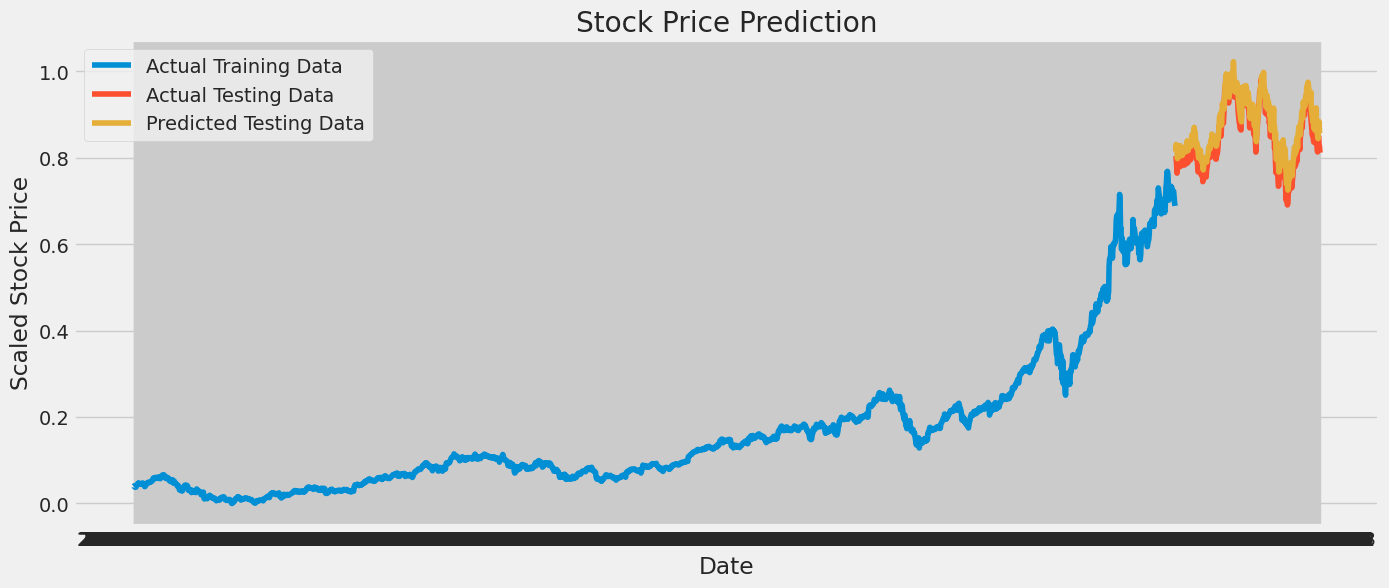

In [167]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten y_train for plotting
y_train_flat = y_train.flatten()

# Create a figure and plot the training data
plt.figure(figsize=(15, 6))
plt.plot(traincopy['Date'], y_train_flat, label='Actual Training Data')

# Plot the testing data
plt.plot(testcopy['Date'], y_test, label='Actual Testing Data')

# Plot the predicted data
plt.plot(testcopy['Date'], y_pred.flatten(), label='Predicted Testing Data')

plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Scaled Stock Price')
plt.legend()
plt.show()


In [168]:

# Convert y_pred and y_test to DataFrames
df_predictions = pd.DataFrame({'Predicted': y_pred.flatten(), 'Actual': y_test.flatten()})

# Display the DataFrame
print(df_predictions)


     Predicted    Actual
0     0.814959  0.804477
1     0.830906  0.800491
2     0.822544  0.788055
3     0.816590  0.764611
4     0.798251  0.786627
..         ...       ...
298   0.844432  0.836192
299   0.870125  0.850591
300   0.884121  0.831670
301   0.860210  0.825839
302   0.856508  0.812094

[303 rows x 2 columns]


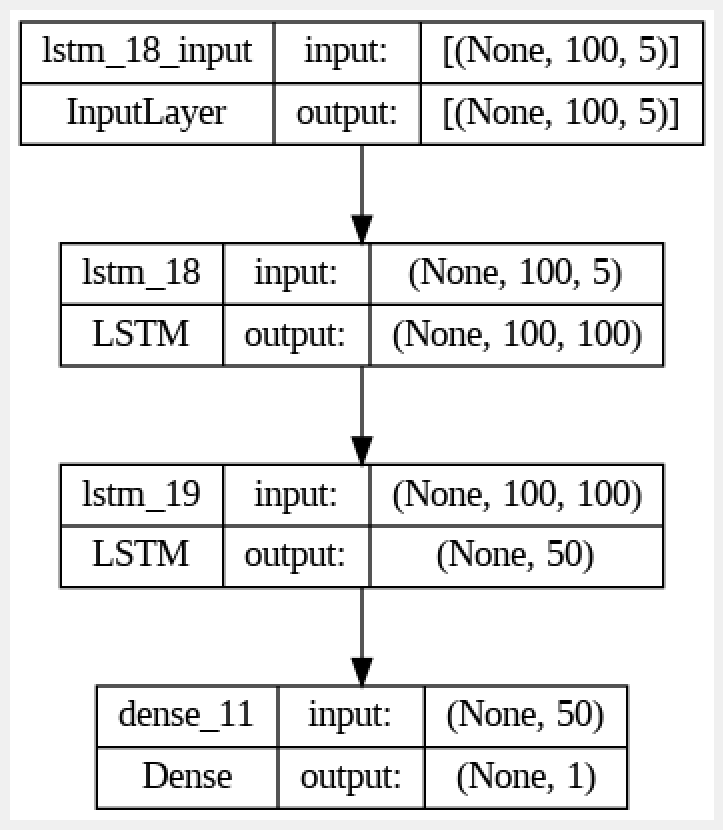

In [170]:
import matplotlib.pyplot as plt
from keras.utils import plot_model

# Assuming you have X_train and y_train defined
model = create_model(x_train, y_train)

# Save the model architecture as an image
plot_model(model, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)

# Display the saved image
img = plt.imread('lstm_model.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


In [171]:
# Assuming 'scaler' is your MinMaxScaler instance
y_pred_original_scale = scaler.inverse_transform(y_pred)
# Assuming 'scaler' is your MinMaxScaler instance
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1))

In [172]:
# Convert y_pred and y_test to DataFrames
df_predictions = pd.DataFrame({'Predicted': y_pred_original_scale.flatten(), 'Actual': y_test_original.flatten()})

# Display the DataFrame
print(df_predictions)


      Predicted      Actual
0    164.032471  162.102086
1    166.969269  161.367904
2    165.429214  159.077690
3    164.332764  154.760245
4    160.955338  158.814693
..          ...         ...
298  169.460266  167.942690
299  174.191925  170.594519
300  176.769348  167.109889
301  172.365860  166.036012
302  171.684113  163.504706

[303 rows x 2 columns]


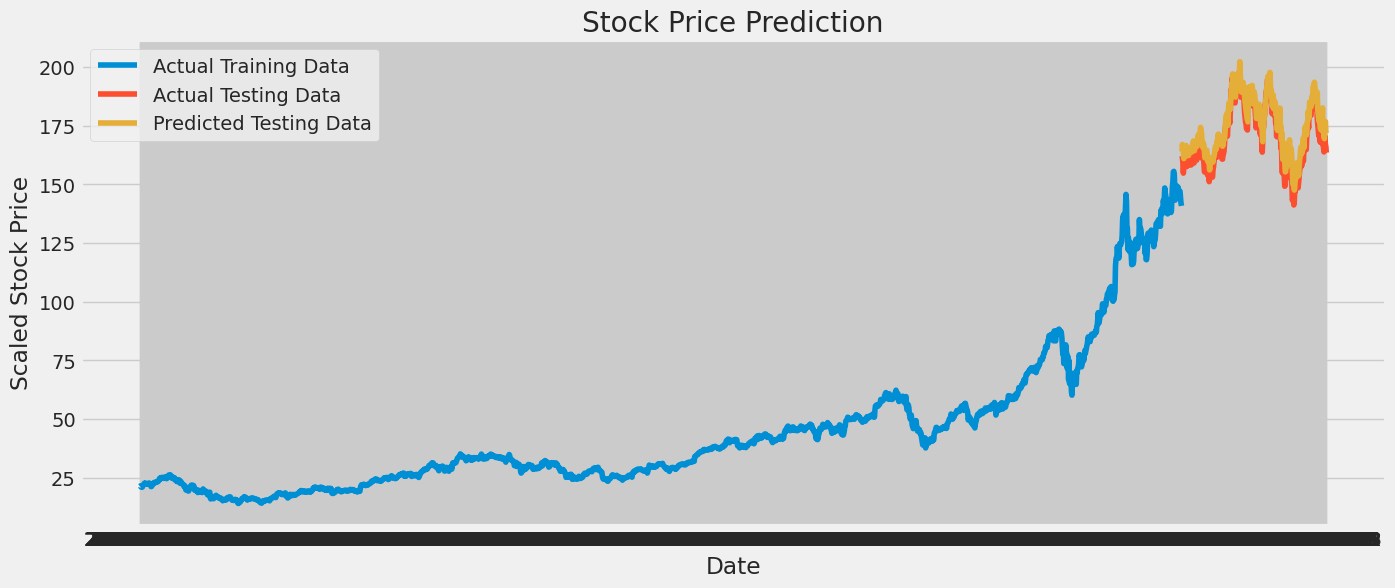

In [173]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten y_train for plotting
y_train_flat = y_train.flatten()

# Create a figure and plot the training data
plt.figure(figsize=(15, 6))
plt.plot(traincopy['Date'], y_train_original, label='Actual Training Data')

# Plot the testing data
plt.plot(testcopy['Date'], y_test_original, label='Actual Testing Data')

# Plot the predicted data
plt.plot(testcopy['Date'], y_pred_original_scale.flatten(), label='Predicted Testing Data')

plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Scaled Stock Price')
plt.legend()
plt.show()
